# Assignment 17/01/2025

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

## Image loading, conversion to grayscale

In [2]:
cam_image = cv2.imread('./sample_cam_image.jpg')
cam_image.min(), cam_image.max(), cam_image.shape

(0, 255, (8160, 6120, 3))

In [3]:
grayscale = cv2.cvtColor(cam_image, cv2.COLOR_BGR2GRAY)
grayscale.shape

(8160, 6120)

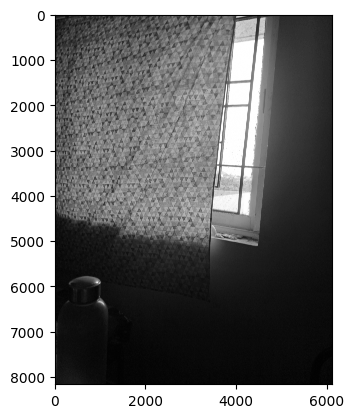

In [4]:
plt.imshow(grayscale, cmap='gray')

## Applying FFT

In [5]:
F = fft.fft2(grayscale)
F.shape

(8160, 6120)

## Shifting zero frequency component

In [6]:
F_shifted = fft.fftshift(F)

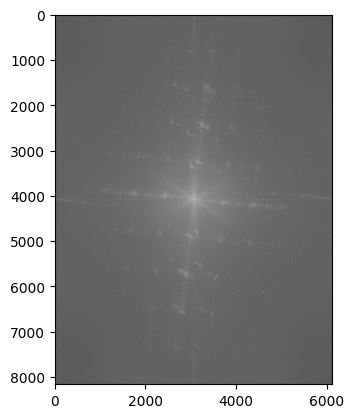

In [7]:
plt.imshow(np.log(np.abs(F_shifted)), cmap='gray')

## Applying filters

### Low-pass filters

#### 1. Ideal

In [8]:
cutoff = 30

In [9]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 1 if dist <= cutoff else 0

In [10]:
ideal_lp = F_shifted * mask
F_ishifted = fft.ifftshift(ideal_lp)
ideal_lp_image = fft.ifft2(F_ishifted)

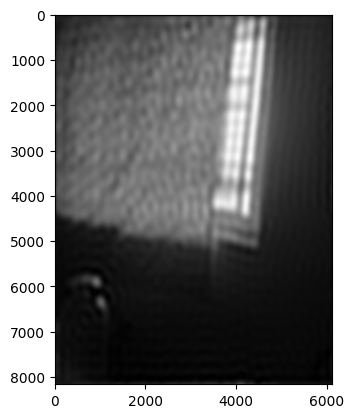

In [11]:
plt.imshow(np.abs(ideal_lp_image), cmap='gray')

#### 2. Butterworth

In [21]:
cutoff = 30
n = 2

In [22]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 1 / (1 + (dist / cutoff) ** (2 * n))

In [23]:
butterworth_lp = F_shifted * mask
F_ishifted = fft.ifftshift(butterworth_lp)
butterworth_lp_image = fft.ifft2(F_ishifted)

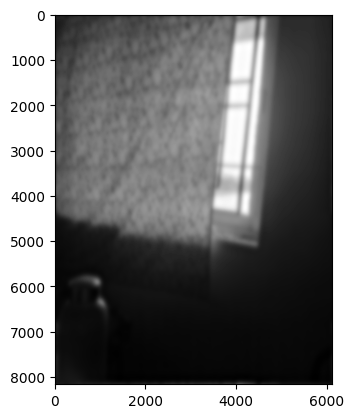

In [24]:
plt.imshow(np.abs(butterworth_lp_image), cmap='gray')

#### 3. Gaussian

In [13]:
cutoff = 15

In [17]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = np.exp(-(dist**2) / (2 * (cutoff**2)))

In [18]:
gaussian_lp = F_shifted * mask
F_ishifted = fft.ifftshift(gaussian_lp)
gaussian_lp_image = fft.ifft2(F_ishifted)

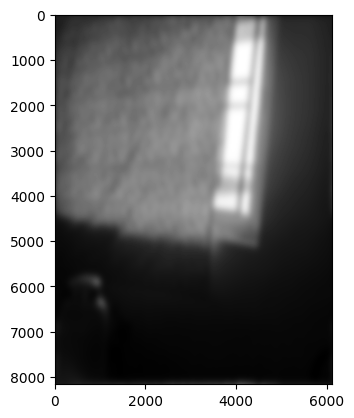

In [19]:
plt.imshow(np.abs(gaussian_lp_image), cmap='gray')

### High-pass filters

#### 1. Ideal

In [20]:
cutoff = 30

In [21]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 0 if dist <= cutoff else 1

In [22]:
ideal_hp = F_shifted * mask
F_ishifted = fft.ifftshift(ideal_hp)
ideal_hp_image = fft.ifft2(F_ishifted)

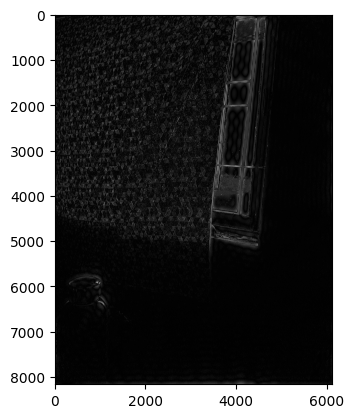

In [23]:
plt.imshow(np.abs(ideal_hp_image), cmap='gray')

#### 2. Butterworth

In [24]:
cutoff = 30
n = 2

In [25]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 1 / (1 + (cutoff / dist) ** (2 * n))

C:\Users\homea\AppData\Local\Temp\ipykernel_30172\757170081.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff / dist) ** (2 * n))


In [26]:
butterworth_hp = F_shifted * mask
F_ishifted = fft.ifftshift(butterworth_hp)
butterworth_hp_image = fft.ifft2(F_ishifted)

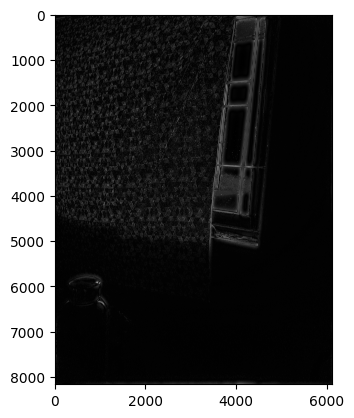

In [27]:
plt.imshow(np.abs(butterworth_hp_image), cmap='gray')

#### 3. Gaussian

In [28]:
cutoff = 15

In [29]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 1 - np.exp(-(dist**2) / (2 * (cutoff**2)))

In [30]:
gaussian_hp = F_shifted * mask
F_ishifted = fft.ifftshift(gaussian_hp)
gaussian_hp_image = fft.ifft2(F_ishifted)

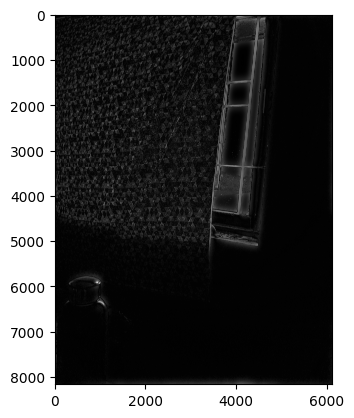

In [31]:
plt.imshow(np.abs(gaussian_hp_image), cmap='gray')

In [33]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        if i == 0 and j == 0:
            continue
        mask[i, j] = -4 * (np.pi**2) / (i**2 + j**2)

In [34]:
laplacian_hp = F_shifted * mask
F_ishifted = fft.ifftshift(laplacian_hp)
laplacian_hp_image = fft.ifft2(F_ishifted)

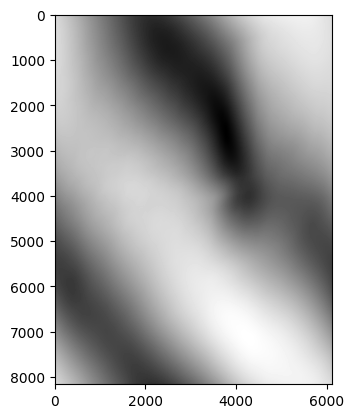

In [35]:
plt.imshow(np.abs(laplacian_hp_image), cmap='gray')

#### 5. Difference of Gaussian

In [45]:
cutoff_1 = 15
cutoff_2 = 30

In [46]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = np.exp(-(dist**2) / (2 * (cutoff_1**2))) - np.exp(-(dist**2) / (2 * (cutoff_2**2)))

In [47]:
dog_hp = F_shifted * mask
F_ishifted = fft.ifftshift(dog_hp)
dog_hp_image = fft.ifft2(F_ishifted)

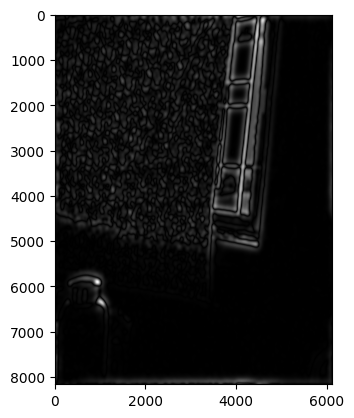

In [48]:
plt.imshow(np.abs(dog_hp_image), cmap='gray')

### Band-pass filter

In [49]:
low_cutoff = 15
high_cutoff = 30

In [50]:
rows, cols = grayscale.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        dist = np.sqrt((i - crow)**2 + (j - ccol)**2)
        mask[i, j] = 1 if (low_cutoff <= dist and dist <= high_cutoff) else 0

In [53]:
ideal_bp = F_shifted * mask
F_ishifted = fft.ifftshift(ideal_bp)
ideal_bp_image = fft.ifft2(F_ishifted)

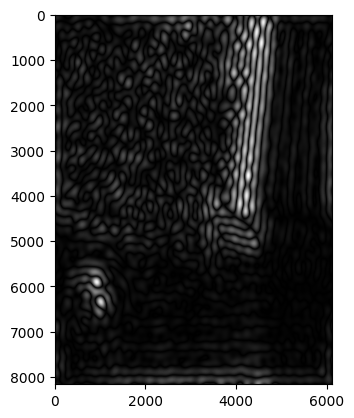

In [54]:
plt.imshow(np.abs(ideal_bp_image), cmap='gray')